In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cấu hình để hiển thị ảnh to rõ hơn trong notebook
plt.rcParams['figure.figsize'] = [15, 10]

# Đọc ảnh
img = cv2.imread("pikachu.jpg")
# Chuyển sang RGB để hiển thị đúng màu với Matplotlib (OpenCV dùng BGR)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

print("Đã tải ảnh thành công!")

Đã tải ảnh thành công!


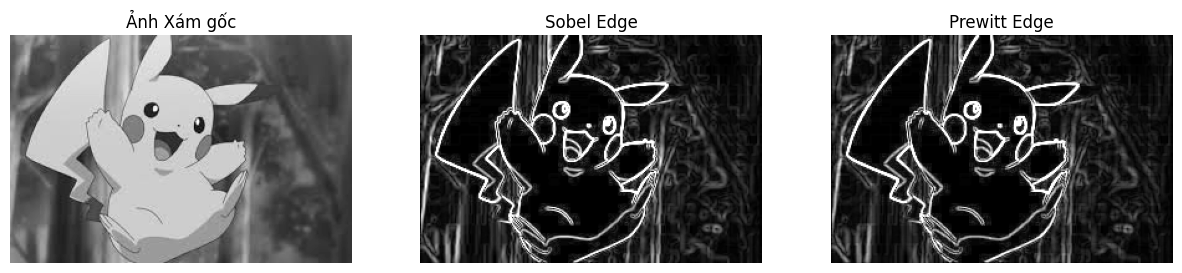

In [2]:
# --- 1. Sobel ---
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
sobel_mag = cv2.magnitude(sobel_x, sobel_y)
sobel = cv2.convertScaleAbs(sobel_mag)

# --- 2. Prewitt ---
prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype=np.float32)
prewitt_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=np.float32)
px = cv2.filter2D(gray, cv2.CV_64F, prewitt_x)
py = cv2.filter2D(gray, cv2.CV_64F, prewitt_y)
prewitt = cv2.convertScaleAbs(np.abs(px) + np.abs(py))

# Hiển thị kết quả
titles = ['Ảnh Xám gốc', 'Sobel Edge', 'Prewitt Edge']
images = [gray, sobel, prewitt]

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()

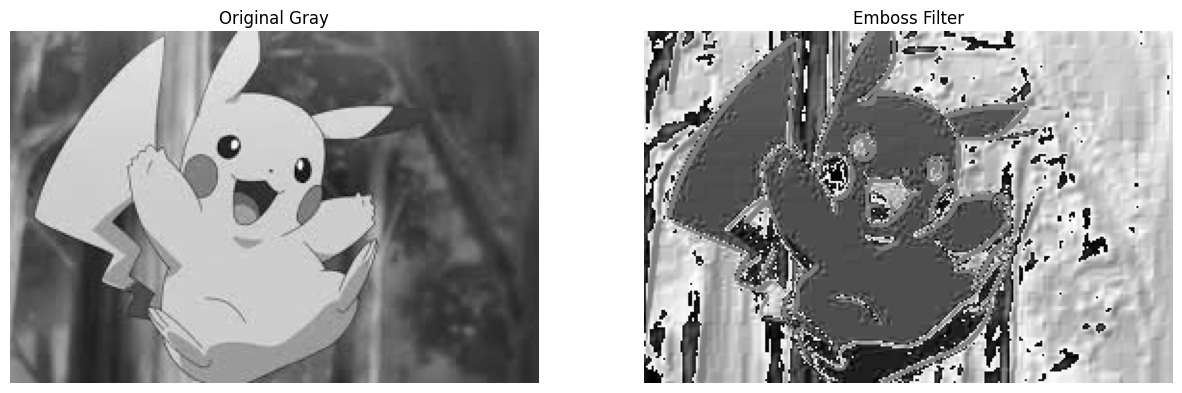

In [3]:
kernel_emboss = np.array([
    [-2, -1,  0],
    [-1,  1,  1],
    [ 0,  1,  2]
], dtype=np.float32)

# Thêm 128 để ảnh không bị quá tối
emboss = cv2.filter2D(gray, -1, kernel_emboss) + 128

plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title("Original Gray")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(emboss, cmap='gray')
plt.title("Emboss Filter")
plt.axis('off')
plt.show()

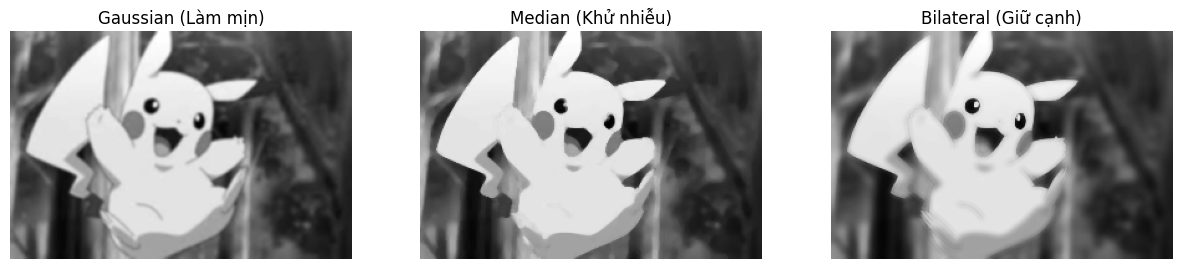

In [4]:
# Các bộ lọc
gaussian_img = cv2.GaussianBlur(gray, (5, 5), 0)
median_img = cv2.medianBlur(gray, 5)
bilateral_img = cv2.bilateralFilter(gray, 9, 75, 75)

titles = ['Gaussian (Làm mịn)', 'Median (Khử nhiễu)', 'Bilateral (Giữ cạnh)']
images = [gaussian_img, median_img, bilateral_img]

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()